In [83]:
# 패션 MNIST 데이터셋은 클래스가 0~9까지의 숫자로 이루어진 패션 아이템 데이터 집합이다.
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

#훈련 데이터 shape
print(train_input.shape, train_target.shape)

#테스트 데이터 shape
print(test_input.shape, test_target.shape)

# 기본 MNIST 데이터셋과 같이 0~9 열 가지로 분류할 수 있는 28x28 픽셀의 이미지 70,000개로 이루어져 있다.
# - 훈련용 데이터셋은 총 60,000개, 28px * 28px 크기의 이미지로 이루어져 있으며,
# - 테스트 데이터셋은 28px * 28px 크기의 이미지가 총 10,000개 포함되어 있다.

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


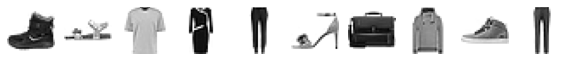

[9, 5, 0, 3, 1, 5, 8, 2, 7, 1]


In [84]:
# 훈련용 데이터의 마지막에서 10개 이미지를 출력
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[-i], cmap='gray_r')
    axs[i].axis('off')
plt.show()
# 각각 사진에 해당하는 레이블(label)은 0~9 사이의 숫자 중 무엇일까?
print([train_target[-i] for i in range(10)])

In [85]:
# 패션 MNIST 데이터셋은 0~9까지의 숫자로, 총 10개의 클래스로 이루어져 있다고 했다.
# - 출력된 결과를 봤을 때, 부츠는 9로 나타나며 슬리퍼는 5, 바지는 1로 구분되어 있는 것 같다.
# - 이처럼 패션MNIST 데이터셋은 의류 카테고리별로 0~9라는 각기 다른 숫자로 구성되어 있다.

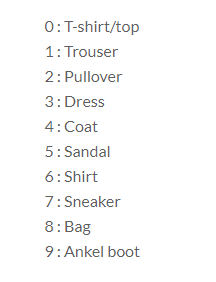

In [86]:
from IPython.display import Image
Image("패션 인덱스.png")

In [87]:
#각 카테고리별로 의류가 몇 개씩 포함되어 있는지 확인해보기 위해 넘파이의 unique메소드로 target을 출력해본 결과
# - 훈련용 데이터셋은 의류 카테고리별로 6,000개씩 균등하게 나눠져있음을 알 수 있었다.

import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64))


In [88]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

# train_input을 255.0으로 나누어주는 부분
# - 이유 : 특성마다 값의 범위가 많이 다르면 올바르게 손실 함수를 구할 수 없기 때문
#  -> 패션 MNIST의 경우 각 픽셀은 0~255 사이의 정수값을 가지며,
#  -> 이런 이미지의 경우 보통 255로 나누어 0~1 사이의 값으로 '정규화'한다.
#  => 표준화는 아니지만 양수 값으로 이루어진 이미지를 전처리(Scaling)할 때 널리 사용하는 방법이다.
train_scaled = train_input / 255.0

# 검증(Validation)을 위해, 전처리한 60,000개의 데이터셋을 훈련세트와 검증세트로 다시 나누어준다.
train_scaled = train_scaled.reshape(-1, 28*28)

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


In [105]:
model = keras.Sequential()

# 28px * 28px의 이미지를 펼쳐주기 위해 Flatten층을 추가하여 784개로 넓게 펼쳐준다.
# -> (사실 Flatten은 입력 데이터를 펼치는 역할밖에 하지 않기때문에 층이라고 부르지는 않는다.)
model.add(keras.layers.Flatten(input_shape=(28, 28)))

# 은닉층을 추가하는데, 해당 예제에서는 100개의 뉴런과 활성화 함수로는 렐루(Relu) 함수로 이루어진 층을 사용하겠다.
# -> 렐루 함수는 0보다 작은 값은 모두 0으로 취하는 함수
model.add(keras.layers.Dense(100, activation='relu', name='hidden1'))

# 마지막엔 층엔 10개의 클래스들 중 가장 높은 z값의 아이템 1개를 고를 수 있도록, 소프트맥스(Softmax) 함수를 사용하는 층을 추가해준다.
model.add(keras.layers.Dense(10, activation='softmax'))

# 이 model에는 summary() 라는 메소드가 있는데, 이 메소드를 호출하면 우리가 구성한 모델의 구조를 출력해준다.
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


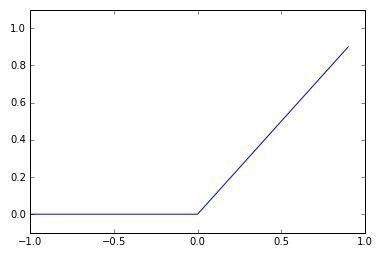

In [98]:
# "0보다 작은 값을 모두 0으로 바꾸어 주는 '렐루(Relu) 함수'
Image("relu함수.jpg")

In [101]:
# 첫 번째 flatten_1을 보면, 28px * 28px을 펼쳐주었기 때문에, 784개의 입력 특성이 있는 걸 확인할 수 있으며,
# Flatten은 픽셀을 넓게 펼치는 역할밖에 하지 않아 Param이 0으로 출력되었다.

# 두번째로, name을 'hidden1'로 지정한 은닉층을 보면, 아까 설정한 바와 같이 100개의 뉴런으로 구성되어 있다.
# Param이 78500개인 이유는 784개의 특성과 100개의 뉴런이 연결되었기 때문이며 절편 100개가 추가로 있기 때문이다.

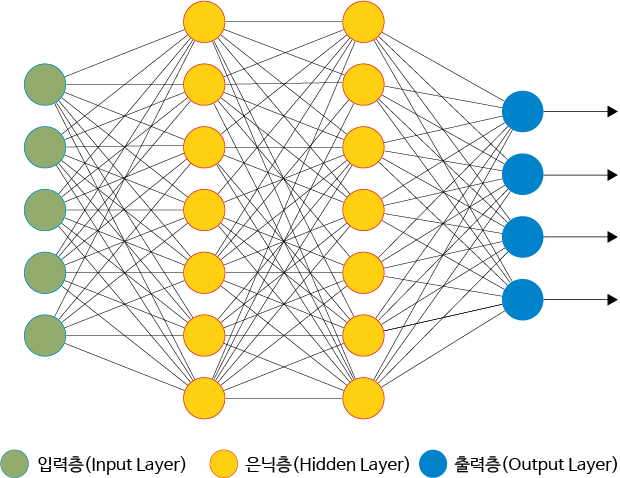

In [102]:
Image("DNN.png")

In [103]:
# 이 그림에서 층과 층 사이에 줄처럼 연결된 것이 있는데,
# - 이 줄이 총 78,400개 연결되어 있고, 절편이 100개 있기 때문에 Param이 78,500개인 것이다.

# 마지막 softmax를 사용한 층에서는 10개의 뉴런을 지정해주었기 때문에,
# - 은닉층의 뉴런 100개와 출력층의 뉴런 10개가 연결되어 1,000개의 Param과 출력층 10개의 절편으로 구성되어
# - 총 1,010개의 파라미터가 생성되었다.

In [106]:
# 이제 이 모델을 컴파일하기 위해 compile() 메소드를 호출해주는데,
# - 이때 옵티마이저(optimizer)는 'adam'으로 설정해주고, 손실 함수로는 '다중 분류 손실 함수'를 사용하겠다.
# - 옵티마이저는 확률적 경사 하강법에서의 개념을 인공 신경망에 적용할 수 있도록 도와주는 것이라고 이해하면 된다.
# - 에폭스(epochs)는 5로 설정하여, 데이터셋을 총 5번 사용하여 훈련하도록 지정해주었다.

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)
model.evaluate(val_scaled, val_target)

Epoch 1/5


ValueError: in user code:

    File "C:\Users\ahasu\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\ahasu\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ahasu\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\ahasu\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\ahasu\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\ahasu\AppData\Roaming\Python\Python39\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_10" is incompatible with the layer: expected shape=(None, 28, 28), found shape=(32, 784)


In [ ]:
# 총 5번에 걸쳐 훈련하는 과정과 손실 함수, 정확도를 출력해준다.
# - 결과적으로 손실 함수 0.33과 정확도 0.88의 모델이 만들어졌다.

In [ ]:
print(model.predict_classes(test_input[:5]))

fig, axs = plt.subplots(1, 5, figsize=(10,10))
for i in range(5):
    axs[i].imshow(test_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [82]:
# 마지막으로 모델에게 테스트 데이터셋에서 5개 정도를 골라서 맞춰보도록 시켜보자.
# -> 맞춘 아이템은 데이터의 예측 클래스가 출력되도록 코딩하였고, 이미지로도 확인해볼 수 있도록 하였다.

In [ ]:
# 코드를 실행해본 결과 [부츠, 상의, 바지, 바지, 셔츠]이며 레이블은 [9 2 1 1 6]가 출력되었다.